In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

## EDA

22050


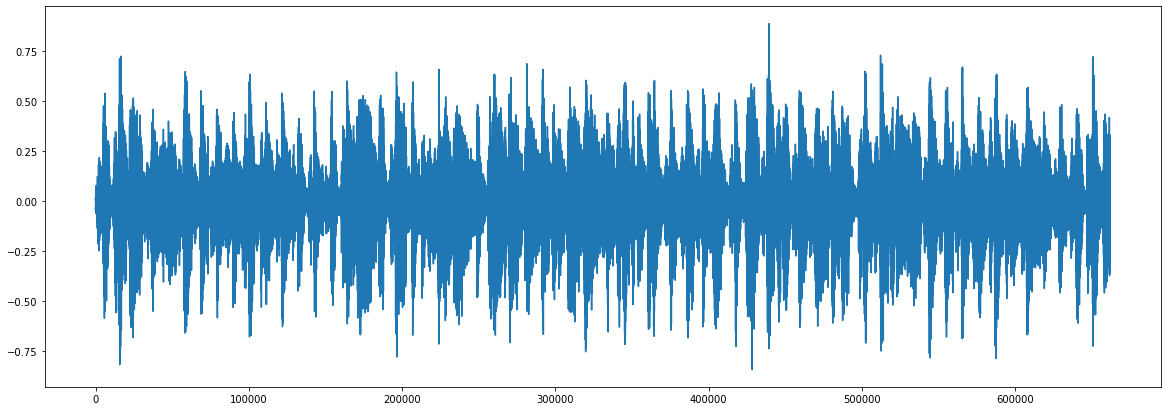

In [2]:
# blues
data,sample_rate = librosa.load("Data/genres_original/blues/blues.00000.wav")
print(sample_rate)
plt.figure(figsize=(20,7))
plt.plot(data)

In [3]:
from playsound import playsound
playsound("Data/genres_original/blues/blues.00000.wav")

22050


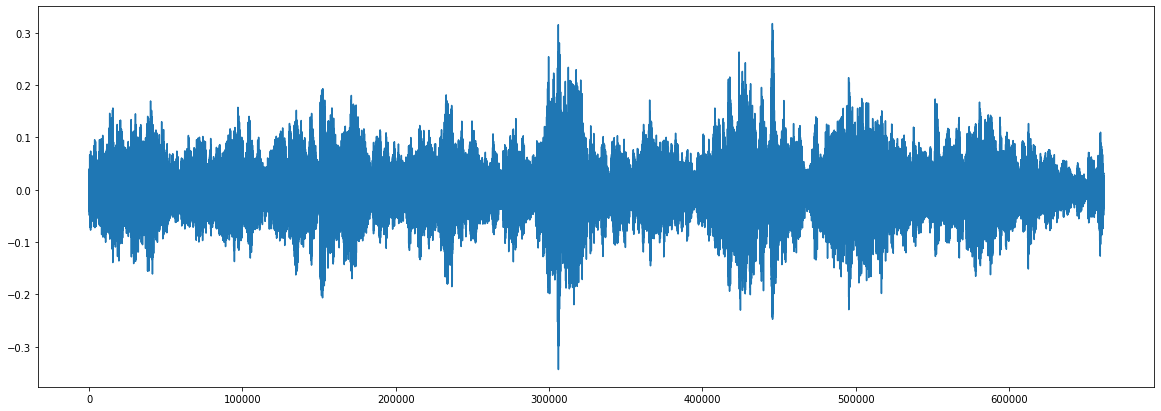

In [4]:
data,sample_rate = librosa.load("Data/genres_original/classical/classical.00000.wav")
print(sample_rate)
plt.figure(figsize=(20,7))
plt.plot(data)

In [5]:
#playsound("Data/genres_original/classical/classical.00000.wav")

22050


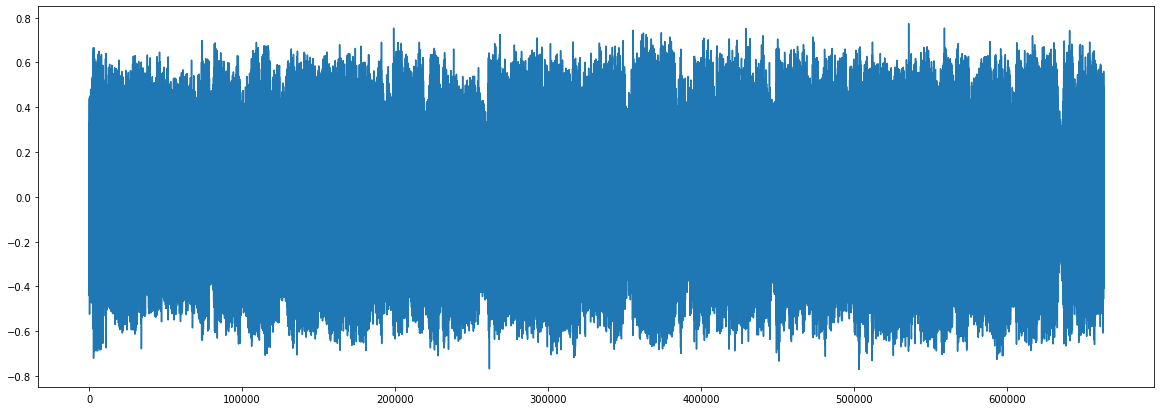

In [6]:
# country
data,sample_rate = librosa.load("Data/genres_original/country/country.00000.wav")
print(sample_rate)
plt.figure(figsize=(20,7))
plt.plot(data)

In [7]:
#playsound("Data/genres_original/country/country.00000.wav")

22050


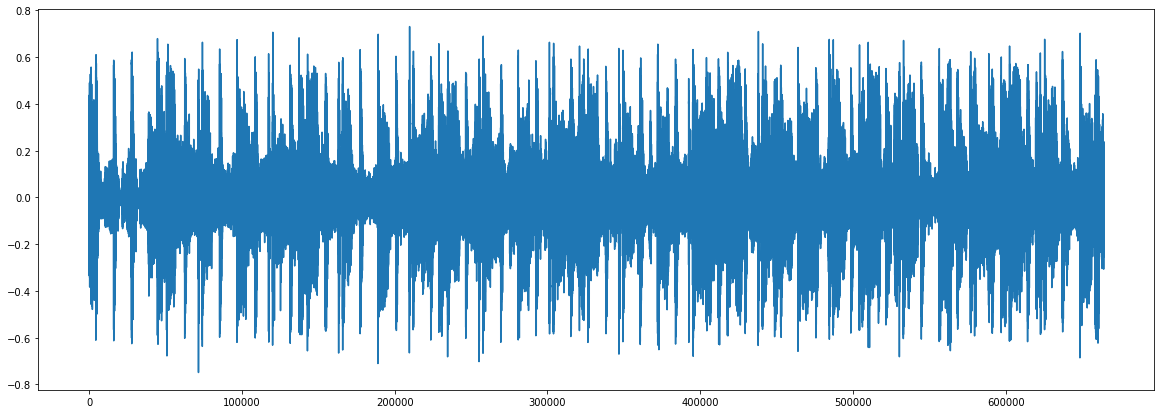

In [8]:
# disco
data,sample_rate = librosa.load("Data/genres_original/disco/disco.00000.wav")
print(sample_rate)
plt.figure(figsize=(20,7))
plt.plot(data)

In [9]:
#playsound("Data/genres_original/disco/disco.00000.wav")

22050


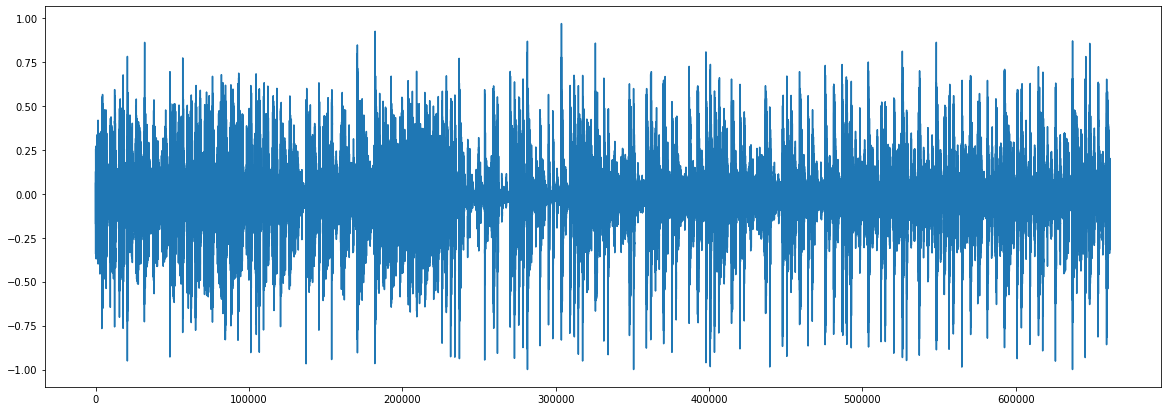

In [10]:
# hiphop
data,sample_rate = librosa.load("Data/genres_original/hiphop/hiphop.00000.wav")
print(sample_rate)
plt.figure(figsize=(20,7))
plt.plot(data)

In [11]:
#playsound("Data/genres_original/hiphop/hiphop.00000.wav")

22050


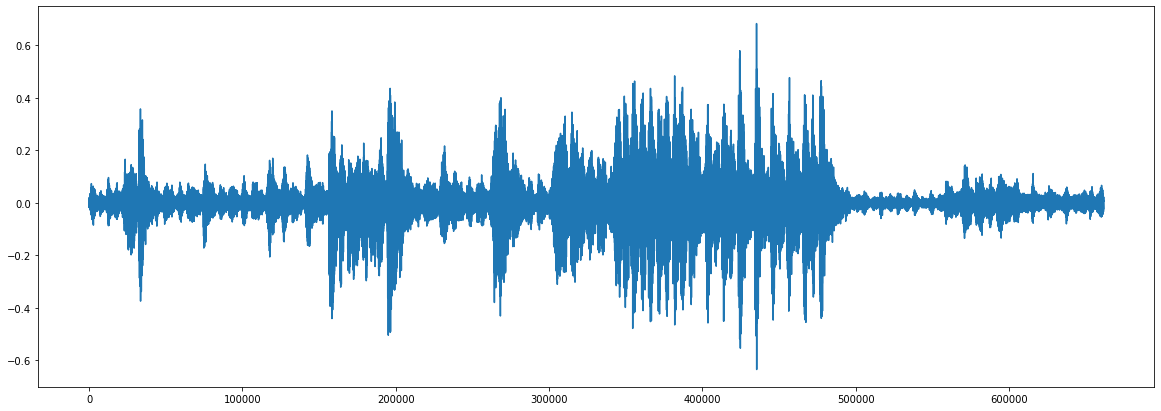

In [12]:
# jazz
data,sample_rate = librosa.load("Data/genres_original/jazz/jazz.00000.wav")
print(sample_rate)
plt.figure(figsize=(20,7))
plt.plot(data)

In [13]:
#playsound("Data/genres_original/jazz/jazz.00000.wav")

### Extracting audio Features

In [14]:
mfcc = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)

In [15]:
print(mfcc.shape)
mfcc

(40, 1293)


array([[-347.90268  , -314.08105  , -290.36508  , ..., -357.93585  ,
        -374.463    , -390.3636   ],
       [ 118.51045  ,  111.72441  ,  122.290436 , ...,  161.23071  ,
         159.19263  ,  156.34988  ],
       [ -12.701944 ,  -22.803318 ,  -25.823135 , ...,    8.790201 ,
          16.149271 ,   25.41525  ],
       ...,
       [  -2.1916063,   -1.6701357,    1.0416608, ...,   -2.929765 ,
          -2.4288936,   -3.864518 ],
       [  -7.996405 ,  -10.114554 ,   -8.728634 , ...,  -12.44148  ,
          -9.958935 ,   -7.3004417],
       [  -1.540324 ,   -1.1176574,   -7.3559494, ...,   -6.5545745,
          -4.581443 ,   -3.7085824]], dtype=float32)

In [16]:
# this file contains unsupported format therefore removing it
'''
import os
os.remove('Data/genres_original/jazz/jazz.00054.wav')
'''

"\nimport os\nos.remove('Data/genres_original/jazz/jazz.00054.wav')\n"

In [17]:
df = pd.read_csv("Data/features_30_sec.csv",usecols=["filename","label"])
df.index[df["filename"] == "jazz.00054.wav"]

Int64Index([554], dtype='int64')

In [18]:
df.drop(554,inplace=True)

In [19]:
df

,filename,label
0,blues.00000.wav,blues
1,blues.00001.wav,blues
2,blues.00002.wav,blues
3,blues.00003.wav,blues
4,blues.00004.wav,blues
...,...,...
995,rock.00095.wav,rock
996,rock.00096.wav,rock
997,rock.00097.wav,rock
998,rock.00098.wav,rock


In [20]:
base = "Data/genres_original"

In [21]:
def feature_extractor(filenames,base):
    file_list = list(filenames)
    df = []
    for filename in file_list:
        class_name = filename.split(".")[0]
        data,sample_rate = librosa.load(base+"/"+class_name+"/"+filename,res_type="kaiser_fast") 
        mfcc = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40).T,axis=0)
        df.append([mfcc,class_name])
    return df

In [22]:
df = feature_extractor(df["filename"],base)

In [23]:
df = pd.DataFrame(df,columns=["audio_features","label"])

In [24]:
df.head()

,audio_features,label
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


### Preparing input and output for model training

In [123]:
x = np.array(df["audio_features"].tolist())
x.shape

(999, 40)

In [26]:
x

array([[-1.13598824e+02,  1.21570671e+02, -1.91622620e+01, ...,
        -5.96903898e-02, -3.45858479e+00, -1.84183240e+00],
       [-2.07523834e+02,  1.23985138e+02,  8.94701862e+00, ...,
        -4.15596932e-01, -1.99541438e+00, -4.65217888e-01],
       [-9.07571640e+01,  1.40440872e+02, -2.90845470e+01, ...,
        -6.70323372e+00, -4.42533398e+00, -9.81519222e-01],
       ...,
       [-1.24989655e+02,  1.15182343e+02, -4.79858856e+01, ...,
        -4.19274712e+00, -3.77881122e+00, -3.88241744e+00],
       [-2.25033325e+02,  1.23657265e+02, -9.74512386e+00, ...,
        -1.46439564e+00, -4.59436029e-01, -1.21137464e+00],
       [-2.35200592e+02,  1.23871750e+02, -2.25461311e+01, ...,
        -5.95418215e+00, -5.25397730e+00,  1.77586174e+00]], dtype=float32)

In [27]:
y = np.array(df["label"].tolist())
y.shape

(999,)

In [28]:
y

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [29]:
import keras

2023-12-19 13:34:14.501883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()
y = to_categorical(encoder.fit_transform(y))
y.shape

(999, 10)

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [193]:
x_train.shape

(799, 40)

In [194]:
x_train

array([[-2.73318024e+02,  1.03152855e+02,  8.71292305e+00, ...,
        -1.99220943e+00, -1.94043517e+00, -3.63050747e+00],
       [-1.22428917e+02,  1.11490433e+02, -1.37000046e+01, ...,
        -1.29055500e+00,  4.69818175e-01, -2.34429502e+00],
       [-4.21594696e+02,  1.72789444e+02,  2.80691853e+01, ...,
        -1.05334115e+00, -6.03246629e-01, -3.62845838e-01],
       ...,
       [-7.41066818e+01,  5.79962044e+01,  9.13595963e+00, ...,
        -2.39841723e+00, -1.94833302e+00, -1.77920043e+00],
       [-1.00844421e+02,  6.42275848e+01,  1.28144608e+01, ...,
         2.24038768e+00,  1.45223677e+00,  6.22510076e-01],
       [-2.35302658e+02,  1.41119522e+02, -3.46818886e+01, ...,
        -6.03263664e+00, -4.19507313e+00,  1.02478242e+00]], dtype=float32)

In [195]:
x_train1 = x_train[:, np.newaxis]
x_train1.shape

(799, 1, 40)

In [196]:
#x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

In [34]:
print(y.shape)
y

(999, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Model Buliding

In [64]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation,Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [74]:
early_stop = EarlyStopping(monitor="val_loss",patience=25)

In [82]:
num_labels = y.shape[1]
num_labels

10

In [197]:
model = Sequential()
model.add(Dense(100,input_shape=(40,),activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100,activation="relu"))
model.add(Dense(num_labels,activation="softmax"))

In [198]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 100)               4100      
                                                                 
 dropout_64 (Dropout)        (None, 100)               0         
                                                                 
 dense_71 (Dense)            (None, 100)               10100     
                                                                 
 dropout_65 (Dropout)        (None, 100)               0         
                                                                 
 dense_72 (Dense)            (None, 100)               10100     
                                                                 
 dense_73 (Dense)            (None, 10)                1010      
                                                                 
Total params: 25,310
Trainable params: 25,310
Non-tra

In [199]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [200]:
model.fit(x_train,y_train,batch_size=32,epochs=250,validation_data=(x_test,y_test))
# model.add(Dropout(0.4))

Epoch 1/250
25/25 [==============================] - 1s 8ms/step - loss: 21.3934 - accuracy: 0.1014 - val_loss: 4.6242 - val_accuracy: 0.1450
Epoch 2/250
25/25 [==============================] - 0s 3ms/step - loss: 10.6200 - accuracy: 0.1227 - val_loss: 2.4853 - val_accuracy: 0.2450
Epoch 3/250
25/25 [==============================] - 0s 3ms/step - loss: 6.6898 - accuracy: 0.1577 - val_loss: 2.2151 - val_accuracy: 0.2250
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 5.3437 - accuracy: 0.1564 - val_loss: 2.1344 - val_accuracy: 0.2500
Epoch 5/250
25/25 [==============================] - 0s 4ms/step - loss: 4.0535 - accuracy: 0.1690 - val_loss: 2.0432 - val_accuracy: 0.2600
Epoch 6/250
25/25 [==============================] - 0s 4ms/step - loss: 3.5410 - accuracy: 0.1927 - val_loss: 2.0810 - val_accuracy: 0.2550
Epoch 7/250
25/25 [==============================] - 0s 4ms/step - loss: 3.1650 - accuracy: 0.1927 - val_loss: 2.1299 - val_accuracy: 0.2450
Epoch 8/250

Epoch 59/250
25/25 [==============================] - 0s 3ms/step - loss: 1.5606 - accuracy: 0.4218 - val_loss: 1.6125 - val_accuracy: 0.5050
Epoch 60/250
25/25 [==============================] - 0s 3ms/step - loss: 1.5612 - accuracy: 0.4143 - val_loss: 1.6159 - val_accuracy: 0.4600
Epoch 61/250
25/25 [==============================] - 0s 4ms/step - loss: 1.5759 - accuracy: 0.4143 - val_loss: 1.6119 - val_accuracy: 0.4400
Epoch 62/250
25/25 [==============================] - 0s 3ms/step - loss: 1.5851 - accuracy: 0.4193 - val_loss: 1.6494 - val_accuracy: 0.4350
Epoch 63/250
25/25 [==============================] - 0s 3ms/step - loss: 1.5369 - accuracy: 0.4243 - val_loss: 1.5968 - val_accuracy: 0.5050
Epoch 64/250
25/25 [==============================] - 0s 3ms/step - loss: 1.5470 - accuracy: 0.4118 - val_loss: 1.5920 - val_accuracy: 0.4550
Epoch 65/250
25/25 [==============================] - 0s 3ms/step - loss: 1.5180 - accuracy: 0.4531 - val_loss: 1.6002 - val_accuracy: 0.4800
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.8694 - accuracy: 0.6871 - val_loss: 1.3703 - val_accuracy: 0.6250
Epoch 174/250
25/25 [==============================] - 0s 3ms/step - loss: 0.8837 - accuracy: 0.6733 - val_loss: 1.3382 - val_accuracy: 0.5950
Epoch 175/250
25/25 [==============================] - 0s 4ms/step - loss: 0.8367 - accuracy: 0.6934 - val_loss: 1.4014 - val_accuracy: 0.5850
Epoch 176/250
25/25 [==============================] - 0s 4ms/step - loss: 0.8713 - accuracy: 0.6796 - val_loss: 1.3712 - val_accuracy: 0.5950
Epoch 177/250
25/25 [==============================] - 0s 4ms/step - loss: 0.8895 - accuracy: 0.6783 - val_loss: 1.3643 - val_accuracy: 0.6000
Epoch 178/250
25/25 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.6984 - val_loss: 1.4167 - val_accuracy: 0.6100
Epoch 179/250
25/25 [==============================] - 0s 3ms/step - loss: 0.9487 - accuracy: 0.6683 - val_loss: 1.3300 - val_accuracy: 0.6050
Epoch 180/250

In [63]:
#plt.plot(model.history.history["loss"])

# 